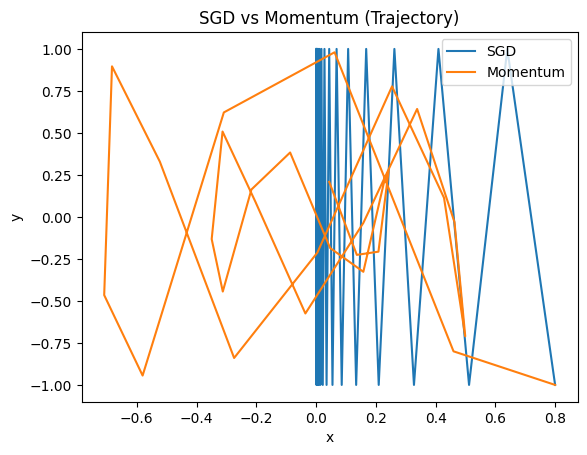

In [1]:
import torch
import matplotlib.pyplot as plt

# Function: f(x, y) = x^2 + 10y^2
def func(x, y):
    return x**2 + 10*y**2

# Tracking
sgd_points = []
mom_points = []

# Initial
x_sgd = torch.tensor([1.0, 1.0], requires_grad=True)
x_mom = torch.tensor([1.0, 1.0], requires_grad=True)

# Optimizers
opt_sgd = torch.optim.SGD([x_sgd], lr=0.1)
opt_mom = torch.optim.SGD([x_mom], lr=0.1, momentum=0.9)

for i in range(30):
    # --- SGD ---
    opt_sgd.zero_grad()
    loss_sgd = func(x_sgd[0], x_sgd[1])
    loss_sgd.backward()
    opt_sgd.step()
    sgd_points.append(x_sgd.detach().clone())

    # --- Momentum ---
    opt_mom.zero_grad()
    loss_mom = func(x_mom[0], x_mom[1])
    loss_mom.backward()
    opt_mom.step()
    mom_points.append(x_mom.detach().clone())

# Plot
sgd_np = torch.stack(sgd_points).numpy()
mom_np = torch.stack(mom_points).numpy()

plt.plot(sgd_np[:,0], sgd_np[:,1], label="SGD")
plt.plot(mom_np[:,0], mom_np[:,1], label="Momentum")
plt.legend()
plt.title("SGD vs Momentum (Trajectory)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [58]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization,Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()

In [77]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

In [78]:
input_layer = Input(shape=(28,28))
Flatten_layer = Flatten()(input_layer)
x = Dense(32)(Flatten_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(16)(x)   
x = BatchNormalization()(x) 
x = Activation('relu')(x)
output_layer = Dense(10,activation='softmax')(x)

sgd_model = Model(inputs=input_layer,outputs=output_layer)

In [79]:
sgd_optimizer = SGD(learning_rate=0.01)


In [80]:
sgd_model.compile(optimizer=sgd_optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [81]:
sgd_model_hist = sgd_model.fit(X_train,y_train,epochs=200,batch_size=32976,validation_data=(X_test,y_test))

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.0624 - loss: 2.5522 - val_accuracy: 0.0832 - val_loss: 2.3197
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.0717 - loss: 2.5020 - val_accuracy: 0.0902 - val_loss: 2.3117
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.0832 - loss: 2.4512 - val_accuracy: 0.0992 - val_loss: 2.3031
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.0992 - loss: 2.4003 - val_accuracy: 0.1086 - val_loss: 2.2941
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.1172 - loss: 2.3502 - val_accuracy: 0.1210 - val_loss: 2.2846
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.1392 - loss: 2.3022 - val_accuracy: 0.1321 - val_loss: 2.2746
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.1637 - loss: 2.2571 - val_accuracy: 0.1456 - val_loss: 2.2641
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.1883 - loss: 2.2155 - val_accuracy: 0.1628 - v

In [82]:
input_layer = Input(shape=(28,28))
Flatten_layer = Flatten()(input_layer)
x = Dense(32)(Flatten_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(16)(x)   
x = BatchNormalization()(x) 
x = Activation('relu')(x)
output_layer = Dense(10,activation='softmax')(x)

momentum_optimizer = SGD(learning_rate=0.01,momentum=0.9)

momentum_model = Model(inputs=input_layer,outputs=output_layer)
momentum_model.compile(optimizer=momentum_optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [83]:
momentum_model_hist = momentum_model.fit(X_train,y_train,epochs=200,batch_size=32976,validation_data=(X_test,y_test))

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.1350 - loss: 2.4120 - val_accuracy: 0.1056 - val_loss: 2.2906
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.1576 - loss: 2.3032 - val_accuracy: 0.1226 - val_loss: 2.2324
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.2133 - loss: 2.1281 - val_accuracy: 0.1722 - val_loss: 2.1584
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.3043 - loss: 1.9480 - val_accuracy: 0.2592 - val_loss: 2.0814
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3906 - loss: 1.8017 - val_accuracy: 0.3581 - val_loss: 2.0087
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.4642 - loss: 1.6905 - val_accuracy: 0.4395 - val_loss: 1.9416
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.5235 - loss: 1.6038 - val_accuracy: 0.4999 - val_loss: 1.8803
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5697 - loss: 1.5333 - val_accuracy: 0.5466 - v

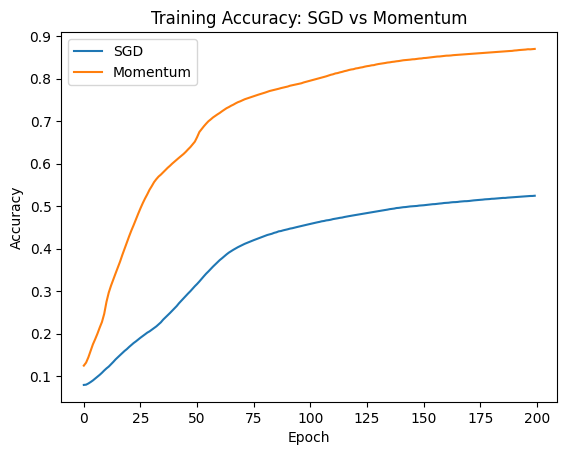

In [75]:
plt.plot(sgd_model_hist.history['accuracy'], label="SGD")
plt.plot(momentum_model_hist.history['accuracy'], label="Momentum")
plt.title("Training Accuracy: SGD vs Momentum")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

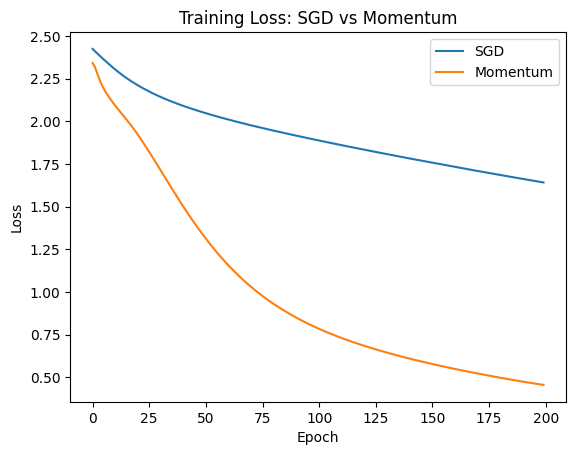

In [76]:
plt.plot(sgd_model_hist.history['loss'], label="SGD")
plt.plot(momentum_model_hist.history['loss'], label="Momentum")
plt.title("Training Loss: SGD vs Momentum")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### **NAG**

In [84]:
input_layer = Input(shape=(28,28))
Flatten_layer = Flatten()(input_layer)
x = Dense(32)(Flatten_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(16)(x)   
x = BatchNormalization()(x) 
output_layer = Dense(10,activation='softmax')(x)

nestrov_optimizer = SGD(learning_rate=0.01,momentum=0.9,nesterov=True)
nesttrov_model = Model(inputs=input_layer,outputs=output_layer)
nesttrov_model.compile(optimizer=nestrov_optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [85]:
nesttrov_model_hist = nesttrov_model.fit(X_train,y_train,epochs=200,batch_size=32976,validation_data=(X_test,y_test))

Epoch 1/200


c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\Deep Learning\deeplen\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.0798 - loss: 2.8534 - val_accuracy: 0.1226 - val_loss: 2.3528
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.1866 - loss: 2.3467 - val_accuracy: 0.2030 - val_loss: 2.1665
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.3298 - loss: 1.9167 - val_accuracy: 0.2740 - val_loss: 2.0032
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.4505 - loss: 1.6333 - val_accuracy: 0.3438 - val_loss: 1.8698
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.5443 - loss: 1.4404 - val_accuracy: 0.4240 - val_loss: 1.7619
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6086 - loss: 1.2988 - val_accuracy: 0.4959 - val_loss: 1.6738
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6622 - loss: 1.1890 - val_accuracy: 0.5484 - val_loss: 1.6001
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.7041 - loss: 1.1006 - val_accuracy: 0.5857 - val_loss: 1.5

### **ADA GRAD**

In [90]:
from tensorflow.keras.optimizers import Adagrad

In [91]:
input_layer = Input(shape=(28,28))
Flatten_layer = Flatten()(input_layer)
x = Dense(32)(Flatten_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(16)(x)   
x = BatchNormalization()(x) 
x = Activation('relu')(x)
output_layer = Dense(10,activation='softmax')(x)

Adagrad_optimizer = Adagrad(learning_rate=0.01)
Adagrad_model = Model(inputs=input_layer,outputs=output_layer)
Adagrad_model.compile(optimizer=Adagrad_optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [92]:
Adagrad_model_hist = Adagrad_model.fit(X_train,y_train,epochs=200,batch_size=32976,validation_data=(X_test,y_test))

c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\Deep Learning\deeplen\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.1035 - loss: 2.4801 - val_accuracy: 0.1002 - val_loss: 2.2829
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.1612 - loss: 2.3068 - val_accuracy: 0.1336 - val_loss: 2.2458
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.2271 - loss: 2.1707 - val_accuracy: 0.1744 - val_loss: 2.2117
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.2855 - loss: 2.0608 - val_accuracy: 0.2037 - val_loss: 2.1805
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.3307 - loss: 1.9719 - val_accuracy: 0.2310 - val_loss: 2.1521
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.3657 - loss: 1.8991 - val_accuracy: 0.2509 - val_loss: 2.1260
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.3952 - loss: 1.8384 - val_accuracy: 0.2716 - val_loss: 2.1020
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.4194 - loss: 1.7867 - val_accuracy: 0.2900 - v

### **RMSProp**

In [95]:
from tensorflow.keras.optimizers import RMSprop

In [96]:
input_layer = Input(shape=(28,28))
Flatten_layer = Flatten()(input_layer)
x = Dense(32)(Flatten_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(16)(x)   
x = BatchNormalization()(x) 
x = Activation('relu')(x)
output_layer = Dense(10,activation='softmax')(x)

rms_optimizer = RMSprop(learning_rate=0.01,rho=0.95)
rms_model = Model(inputs=input_layer,outputs=output_layer)
rms_model.compile(optimizer=rms_optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [97]:
rms_model_hist = rms_model.fit(X_train,y_train,epochs=200,batch_size=32976,validation_data=(X_test,y_test))

Epoch 1/200


c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\Deep Learning\deeplen\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.2632 - loss: 2.2148 - val_accuracy: 0.4771 - val_loss: 1.5056
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.6958 - loss: 1.2623 - val_accuracy: 0.6685 - val_loss: 1.1530
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.7960 - loss: 0.9322 - val_accuracy: 0.6855 - val_loss: 1.0372
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.8442 - loss: 0.7566 - val_accuracy: 0.6879 - val_loss: 1.0268
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8584 - loss: 0.6583 - val_accuracy: 0.7258 - val_loss: 0.9376
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.8851 - loss: 0.5452 - val_accuracy: 0.7555 - val_loss: 0.8624
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.8993 - loss: 0.4652 - val_accuracy: 0.7894 - val_loss: 0.8004
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.9101 - loss: 0.4086 - val_accuracy: 0.8179 - val_loss: 0.7

## **Adam**

In [100]:
from tensorflow.keras.optimizers import Adam

In [105]:
input_layer = Input(shape=(28,28))
Flatten_layer = Flatten()(input_layer)
x = Dense(32)(Flatten_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(16)(x)   
x = BatchNormalization()(x) 
x = Activation('relu')(x)
output_layer = Dense(10,activation='softmax')(x)

adam_optimizer = Adam(learning_rate=0.01)
adam_model = Model(inputs=input_layer,outputs=output_layer)
adam_model.compile(optimizer=adam_optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
adam_model_hist = adam_model.fit(X_train,y_train,epochs=200,batch_size=32976,validation_data=(X_test,y_test))

Epoch 1/200


c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\Deep Learning\deeplen\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.2508 - loss: 2.2486 - val_accuracy: 0.3569 - val_loss: 1.9787
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.5544 - loss: 1.5892 - val_accuracy: 0.4368 - val_loss: 1.7281
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.6532 - loss: 1.3929 - val_accuracy: 0.4771 - val_loss: 1.5328
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.7215 - loss: 1.2514 - val_accuracy: 0.5472 - val_loss: 1.3680
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.7750 - loss: 1.1257 - val_accuracy: 0.6219 - val_loss: 1.2183
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.8118 - loss: 1.0129 - val_accuracy: 0.6770 - val_loss: 1.0859
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.8348 - loss: 0.9105 - val_accuracy: 0.7071 - val_loss: 0.9790
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.8499 - loss: 0.8176 - val_accuracy: 0.7291 - val_loss: 0.8

: 

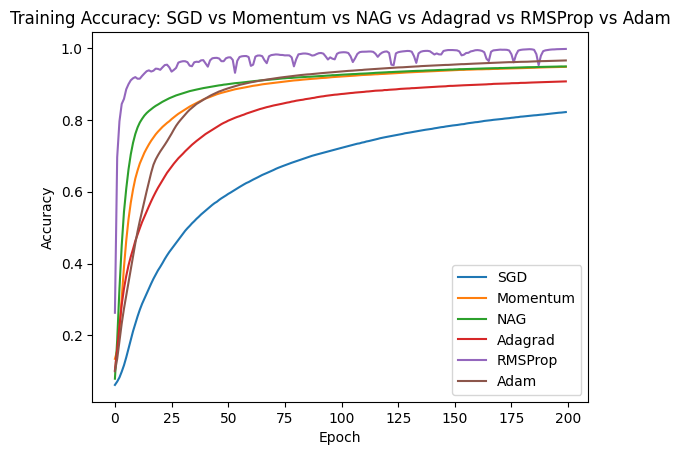

In [103]:
plt.plot(sgd_model_hist.history['accuracy'], label="SGD")
plt.plot(momentum_model_hist.history['accuracy'], label="Momentum")
plt.plot(nesttrov_model_hist.history['accuracy'], label="NAG")
plt.plot(Adagrad_model_hist.history['accuracy'], label="Adagrad")
plt.plot(rms_model_hist.history['accuracy'], label="RMSProp")
plt.plot(adam_model_hist.history['accuracy'], label="Adam")
plt.title("Training Accuracy: SGD vs Momentum vs NAG vs Adagrad vs RMSProp vs Adam")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

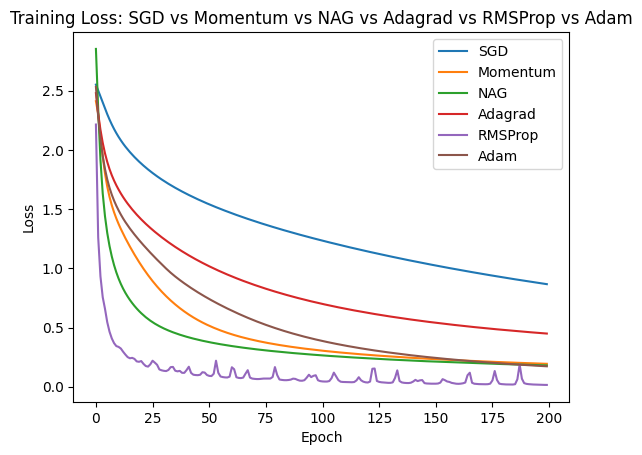

In [104]:
plt.plot(sgd_model_hist.history['loss'], label="SGD")
plt.plot(momentum_model_hist.history['loss'], label="Momentum")
plt.plot(nesttrov_model_hist.history['loss'],label = "NAG")
plt.plot(Adagrad_model_hist.history['loss'], label="Adagrad")
plt.plot(rms_model_hist.history['loss'], label="RMSProp")
plt.plot(adam_model_hist.history['loss'], label="Adam")
plt.title("Training Loss: SGD vs Momentum vs NAG vs Adagrad vs RMSProp vs Adam")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()